In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os
import matplotlib.pyplot as plt
from striatum.bandit import linucb
from utils.data import *
from utils.policy import *
plt.style.use('seaborn')

In [3]:
DATA_DIR = os.path.abspath('../../Data/yahoo!_front_page_today_module_user_click_log/R6')
DATA_FILE_NAMES = ['ydata-fp-td-clicks-v1_0.2009050{}.gz'.format(str(d + 3)) for d in range(7)]
MODEL_DIR = os.path.abspath('models')

In [4]:
data_paths = []
for data_file in DATA_FILE_NAMES:
    data_paths.append(os.path.join(DATA_DIR, data_file))

In [5]:
policy_learner = PolicyLearner(linucb.LinUCB, context_dimension=6, alpha=0.2, seed=0, reset_freq=1000000)
param_grid = {'data_size': [0.01, 0.05, 0.1, 0.2, 0.3, 1.0]}

In [6]:
res = search_param(policy_learner, param_grid, parse_data, data_paths=data_paths)

Parameters: {'data_size': 0.01} | Average Reward: 5.2614% | Computation Time: 3:54:01
Parameters: {'data_size': 0.05} | Average Reward: 5.5056% | Computation Time: 3:55:14
Parameters: {'data_size': 0.1} | Average Reward: 5.5111% | Computation Time: 4:03:29
Parameters: {'data_size': 0.2} | Average Reward: 5.9913% | Computation Time: 4:08:41
Parameters: {'data_size': 0.3} | Average Reward: 6.1265% | Computation Time: 4:44:35
Parameters: {'data_size': 1.0} | Average Reward: 6.3875% | Computation Time: 6:17:57


In [7]:
if not os.path.isdir(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
with open(os.path.join(MODEL_DIR, 'model_disjoint_linucb.pkl'), 'wb') as file:
    pickle.dump(res, file)

In [9]:
with open(os.path.join(MODEL_DIR, 'model_disjoint_linucb.pkl'), 'rb') as file:
    res = pickle.load(file)

Best Parameter: {'data_size': 1}
Cumulative CTR: 6.3875%


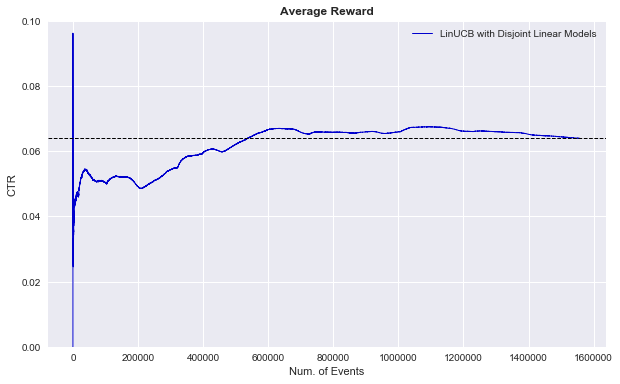

In [10]:
best_param = res['param'][np.argmax(res['avg_reward'])]
cum_ctr = np.max(res['avg_reward'])
print('Best Parameter: {0}\nCumulative CTR: {1:0.4%}'.format(best_param, cum_ctr))
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.plot(res['seq_avg_reward'][np.argmax(res['avg_reward'])], color='mediumblue', 
            label='LinUCB with Disjoint Linear Models', linewidth=1)
ax.axhline(y=cum_ctr, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Num. of Events')
ax.set_ylabel('CTR')
ax.set_ylim([0.0, 0.1])
ax.legend(loc='best')
_ = ax.set_title('Average Reward', fontsize=12, fontweight='bold')